Saving IMAGEN A COLOR.jpg to IMAGEN A COLOR.jpg


(np.float64(-0.5), np.float64(637.5), np.float64(426.5), np.float64(-0.5))

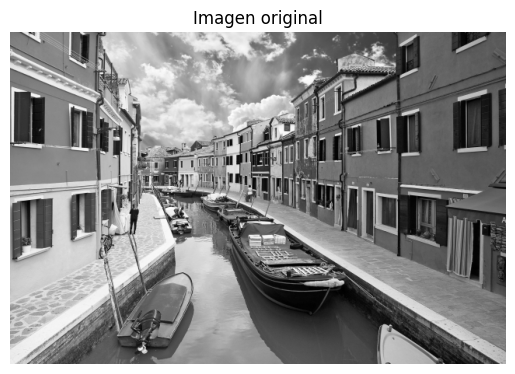

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

from google.colab import files
uploaded = files.upload()

img = cv2.imread(list(uploaded.keys())[0], cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap='gray')
plt.title("Imagen original")
plt.axis('off')

(np.float64(-0.5), np.float64(637.5), np.float64(426.5), np.float64(-0.5))

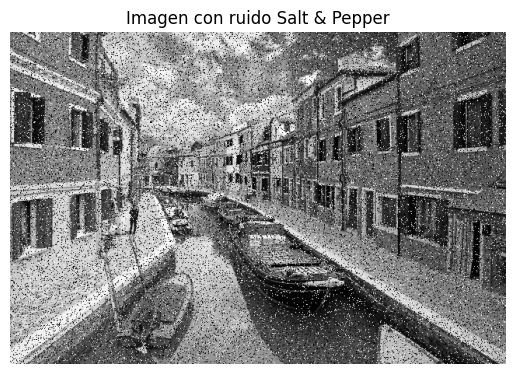

In [ ]:
def add_salt_pepper_noise(image, salt_prob=0.05, pepper_prob=0.05): #controlar sal y pimienta por aparte
    noisy = image.copy()
    h, w = image.shape

    for i in range(h):
        for j in range(w):
            r = np.random.rand()
            if r < pepper_prob:
                noisy[i, j] = 0        # pepper
            elif r < pepper_prob + salt_prob:
                noisy[i, j] = 255      # salt
    return noisy

noisy_img = add_salt_pepper_noise(img, salt_prob=0.05, pepper_prob=0.10)

plt.imshow(noisy_img, cmap='gray')
plt.title("Imagen con ruido Salt & Pepper")
plt.axis('off')


(np.float64(-0.5), np.float64(637.5), np.float64(426.5), np.float64(-0.5))

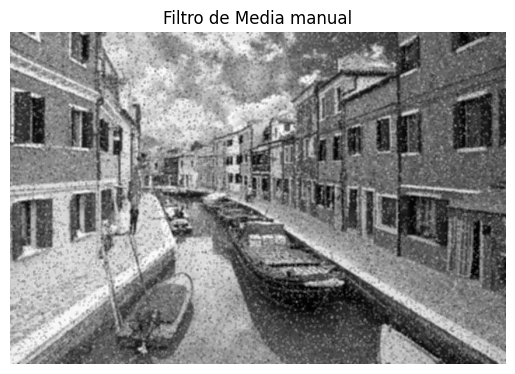

In [ ]:
def mean_filter(image, k=3):
    pad = k // 2
    padded = np.pad(image, pad, mode='edge')
    output = np.zeros_like(image)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            kernel = padded[i:i+k, j:j+k]
            output[i, j] = np.mean(kernel)

    return output.astype(np.uint8)

mean_img = mean_filter(noisy_img, 3)

plt.imshow(mean_img, cmap='gray')
plt.title("Filtro de Media manual")
plt.axis('off')

(np.float64(-0.5), np.float64(637.5), np.float64(426.5), np.float64(-0.5))

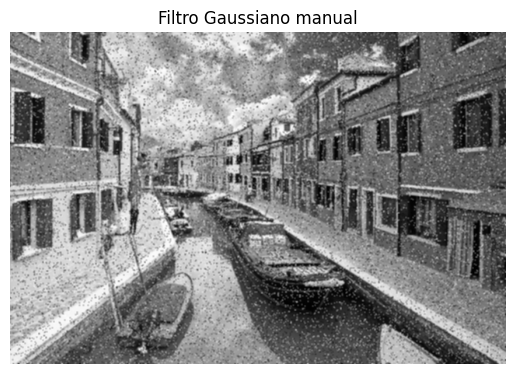

In [ ]:
def gaussian_kernel(k=3, sigma=1):
    ax = np.linspace(-(k // 2), k // 2, k)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-(xx**2 + yy**2) / (2 * sigma**2))
    return kernel / np.sum(kernel)

def gaussian_filter(image, k=3, sigma=1):
    kernel = gaussian_kernel(k, sigma)
    pad = k // 2
    padded = np.pad(image, pad, mode='edge')
    output = np.zeros_like(image)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            region = padded[i:i+k, j:j+k]
            output[i, j] = np.sum(region * kernel)

    return output.astype(np.uint8)

gauss_img = gaussian_filter(noisy_img, 3, 1)

plt.imshow(gauss_img, cmap='gray')
plt.title("Filtro Gaussiano manual")
plt.axis('off')


(np.float64(-0.5), np.float64(637.5), np.float64(426.5), np.float64(-0.5))

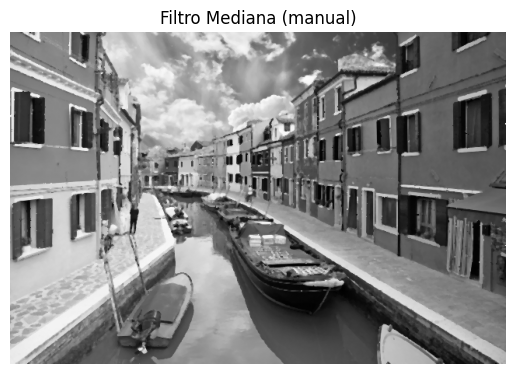

In [ ]:
def median_filter(image, k=3):
    pad = k // 2
    padded = np.pad(image, pad, mode='edge')
    output = np.zeros_like(image)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            region = padded[i:i+k, j:j+k]
            output[i, j] = np.median(region)

    return output.astype(np.uint8)

median_img = median_filter(noisy_img, 3)

plt.imshow(median_img, cmap='gray')
plt.title("Filtro Mediana manual")
plt.axis('off')


(np.float64(-0.5), np.float64(637.5), np.float64(426.5), np.float64(-0.5))

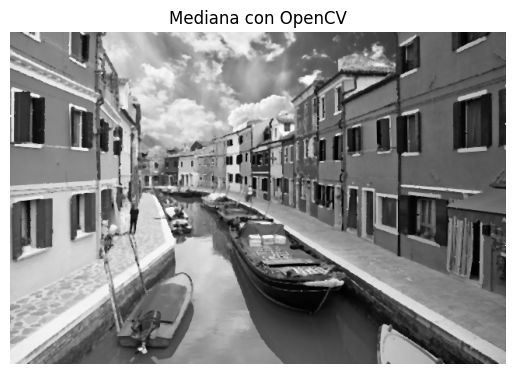

In [ ]:
opencv_median = cv2.medianBlur(noisy_img, 3)

plt.imshow(opencv_median, cmap='gray')
plt.title("Mediana con OpenCV")
plt.axis('off')



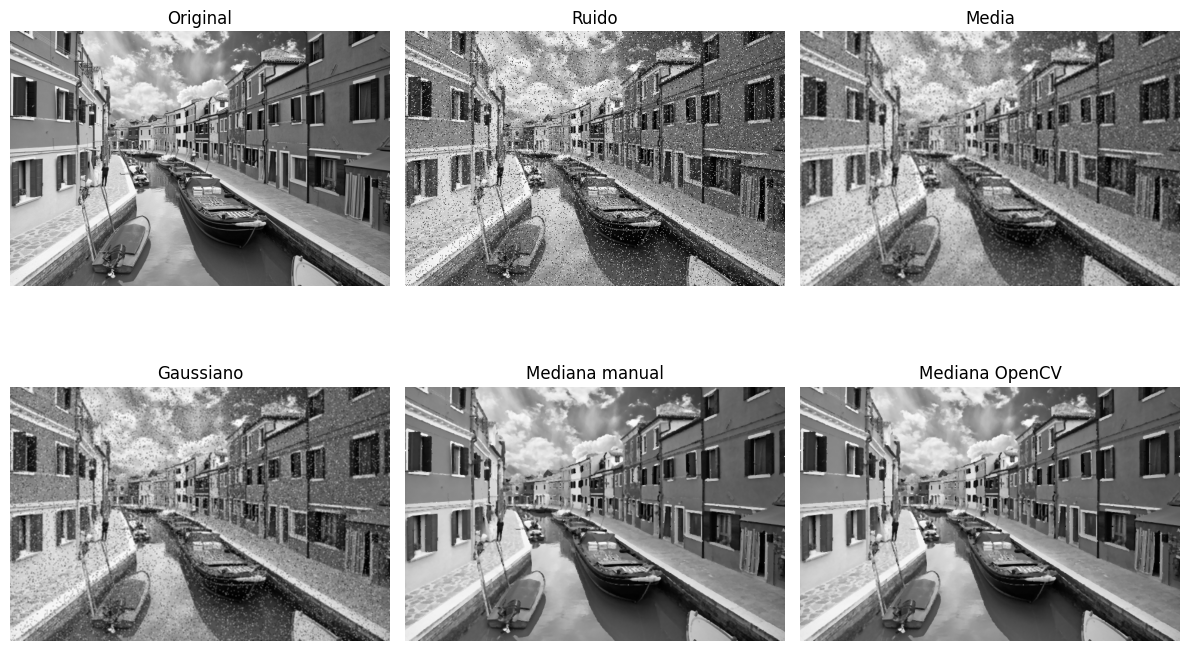

In [ ]:
titles = ["Original", "Ruido", "Media", "Gaussiano", "Mediana manual", "Mediana OpenCV"]
images = [img, noisy_img, mean_img, gauss_img, median_img, opencv_median]

plt.figure(figsize=(12, 8))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()
